In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/df.csv', na_values=[' '])
df.head()

userId  movieId  rating  timestamp                        title     Genre0  \
0       1        1     4.0  964982703             Toy Story (1995)  Adventure   
1       1        3     4.0  964981247      Grumpier Old Men (1995)     Comedy   
2       1        6     4.0  964982224                  Heat (1995)     Action   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)    Mystery   
4       1       50     5.0  964982931   Usual Suspects, The (1995)      Crime   

      Genre1    Genre2  Genre3   Genre4 Genre5  
0  Animation  Children  Comedy  Fantasy    NaN  
1    Romance       NaN     NaN      NaN    NaN  
2      Crime  Thriller     NaN      NaN    NaN  
3   Thriller       NaN     NaN      NaN    NaN  
4    Mystery  Thriller     NaN      NaN    NaN

In [3]:
# df['Genre0'].nunique() # 19

In [3]:
# what is the average rating?
# df['rating'].mean() # 3.501556983616962
# df['rating'].median() # 3.5

3.5

In [5]:
# df.groupby('Genre0')['rating'].mean()

# (no genres listed)    3.489362
# Action                3.447984
# Adventure             3.566029
# Animation             3.578266
# Children              3.153553
# Comedy                3.393901
# Crime                 3.834191
# Documentary           3.829557
# Drama                 3.647205
# Fantasy               3.496825
# Film-Noir             4.080357
# Horror                3.039821
# Musical               3.652985
# Mystery               3.855533
# Romance               3.104000
# Sci-Fi                3.460641
# Thriller              3.426752
# War                   3.555556
# Western               3.658940

<AxesSubplot:xlabel='Genre0'>

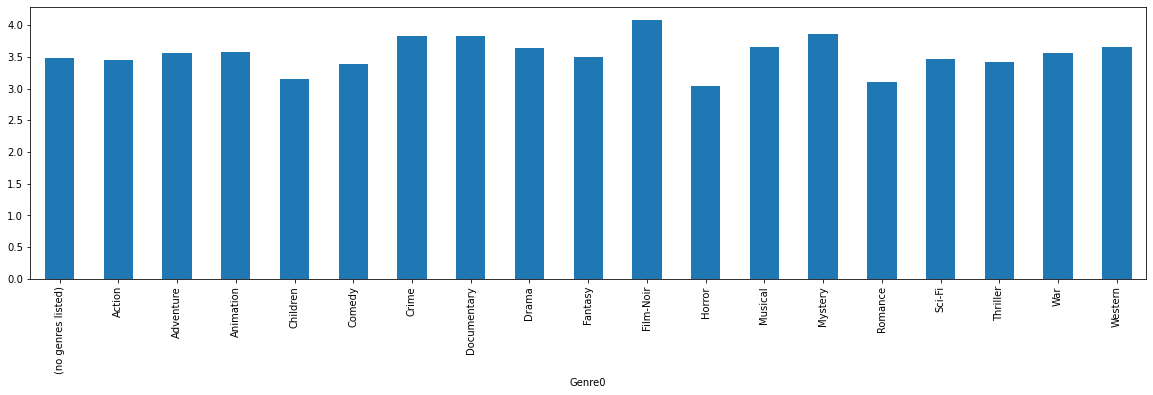

In [6]:
df.groupby('Genre0')['rating'].mean().plot(kind = 'bar', figsize=(20, 5))

In [7]:
# df['Genre0'].mode() # Action ## 3.447984
# df['Genre1'].mode() # Drama ## 3.647205
# df['Genre2'].mode() # Thriller ## 3.426752

In [8]:
# what is the average number of ratings?
# df.groupby('movieId')['userId'].nunique().mean() # 10.369806663924312

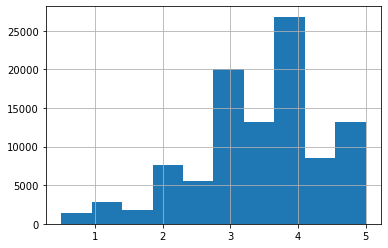

In [9]:
df['rating'].hist();

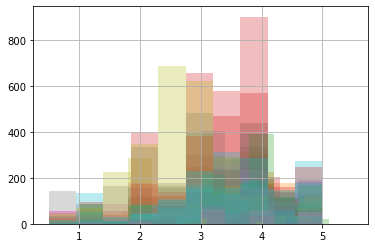

In [10]:
# how is the number of ratings per user distributed? ### ??????
df.groupby('userId')['rating'].hist(alpha=0.3);

<AxesSubplot:>

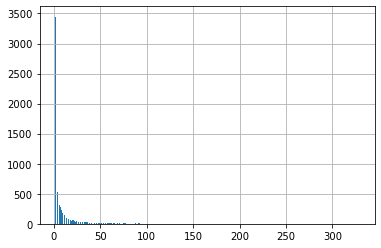

In [11]:
# how is the number of ratings per movie distributed?
# df.groupby('movieId')['userId'].nunique().min() ## 1
# df.groupby('movieId')['userId'].nunique().max() ## 329
df.groupby('movieId')['userId'].nunique().hist(bins = 500)

In [12]:
df['title_only'] = df['title'].replace('\(.*', '', regex = True)
new_df = df[['userId', 'title_only', 'rating']]
# new_df.shape # (100836, 3)
new_df.head()

userId            title_only  rating
0       1            Toy Story      4.0
1       1     Grumpier Old Men      4.0
2       1                 Heat      4.0
3       1                Seven      5.0
4       1  Usual Suspects, The      5.0

In [13]:
# new_df.pivot(index = 'userId', columns = 'title_only', values = 'rating')

In [14]:
# train the NMF on the 100k movie data.